### About

This was an open-ended project for a social network analysis class at university. The goal of the project was to analyze a network through metrics and networkx visualzation. The data in this project was manually recorded from an instagram community in an excel file and then converted into a csv to create a **pandas** dataframe. In **data transformation**, I used **regular expression** to create lists of users and tags and create edges between accounts that tag each other. This was considered a connection and useful for our analysis. We also gave accounts labels based on if they were a photography account or registered student organization to explain different activity. 

In [10]:
import pandas as pd
import itertools
import networkx as nx
import re

### Reading in Data

In [11]:
df = pd.read_csv('IS324Data.csv')
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'IS324Data.csv'

### Data Transformation

In [ ]:
pattern = re.compile(r'@([a-zA-Z0-9_]+)')

df['tag_list'] = df['Content tags'].apply(lambda x: pattern.findall(str(x)))
df['User'] = df['User ID'].apply(lambda x: pattern.findall(str(x)))
df['account_list'] = df['User'] + df['tag_list']
print(df['account_list'][:5])

0       [hyggediaryy, lifebysophia, haku_thedoodle]
1                       [lifebysophia, hyggediaryy]
2                     [haku_thedoodle, hyggediaryy]
3                      [shotfromdeep, nathan_hongk]
4    [snipyang, pengflick, mcnd_official, kfuseent]
Name: account_list, dtype: object


In [ ]:
edges = []
for idx, val in df['account_list'].items():
    edges.extend(list(itertools.combinations(val, 2)))
edges[:5]

[('hyggediaryy', 'lifebysophia'),
 ('hyggediaryy', 'haku_thedoodle'),
 ('lifebysophia', 'haku_thedoodle'),
 ('lifebysophia', 'hyggediaryy'),
 ('haku_thedoodle', 'hyggediaryy')]

In [ ]:
rsos = ['flashpointuiuc', 'mimosauiuc', 'aaa_uiuc', 'kprojectuiuc', 'mixedmotions_', 'imagination_uiuc']
photography = ['shotfromdeep','nathan_hongk','snipyang','pengflick','paked_media','shenny.visuals','pykfilm', 's7eev', 'mcmurrayvisuals', 'elijahjohnstonmedia']
role = {}
for val in [i for sublist in df['account_list'] for i in sublist]:
    if val in rsos:
      role[val] = 'rso'
    elif val in photography:
        role[val] = 'photographer'
    else:
        role[val]='other'


### NetworkX

In [ ]:
G = nx.Graph()

In [ ]:
G.add_edges_from(edges)

In [ ]:
nx.set_node_attributes(G, role, 'role')
nx.set_node_attributes(G, nx.degree_centrality(G), 'degree')
nx.set_node_attributes(G, nx.betweenness_centrality(G), 'betweenness')
nx.set_node_attributes(G, nx.closeness_centrality(G), 'closeness')

In [ ]:
for node in G.nodes():
    if G.nodes[node]['role'] == 'other':
        G.nodes[node]['color'] = 'crimson'
    elif G.nodes[node]['role'] == 'photographer':
        G.nodes[node]['color'] = 'blue'
    elif G.nodes[node]['role'] == 'rso':
        G.nodes[node]['color'] = 'green'

### Visualization

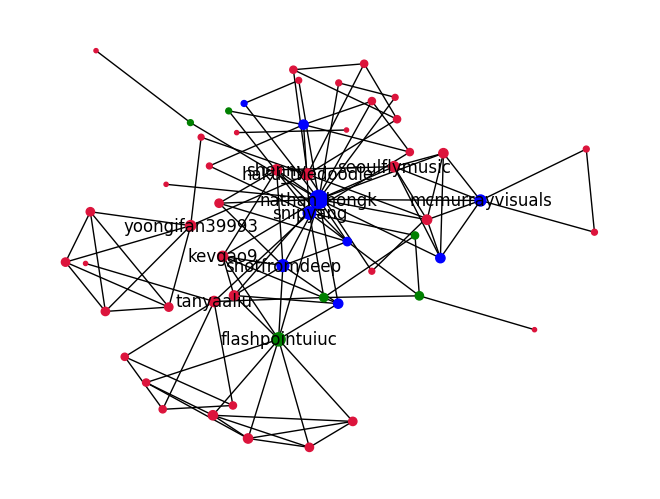

In [ ]:
pos=nx.kamada_kawai_layout(G)
nx.draw(G,
        pos=pos,
        node_size = [G.nodes[node]['degree']*500 for node in G.nodes()],
        node_color=[G.nodes[node]['color'] for node in G.nodes()],
        labels={node:node for node in G.nodes() if G.nodes[node]['degree'] > 0.1})

In [ ]:
def ego_EI_idx(graph_object):
    EI_dic = {}
    for k in graph_object.nodes:
        external = 0
        internal = 0
        try:
            for i in graph_object.edges(k):
                if graph_object.nodes[i[1]]['role'] == graph_object.nodes[k]['role']:
                    internal += 1
                else:
                    external += 1
        except ZeroDivisionError:
            pass
        if external + internal != 0:
            EI_dic[k] = (external - internal) / (external + internal)
        else:
            EI_dic[k] = 0
    nx.set_node_attributes(graph_object, EI_dic, name="ei_idx")

In [ ]:
ego_EI_idx(G)

NameError: name 'G' is not defined

In [ ]:
G.nodes['nathan_hongk'], G.nodes['haku_thedoodle'], G.nodes['flashpointuiuc']

({'role': 'photographer',
  'degree': 0.33928571428571425,
  'betweenness': 0.16515151515151513,
  'closeness': 0.3719387755102041,
  'color': 'blue',
  'ei_idx': 0.3684210526315789},
 {'role': 'other',
  'degree': 0.125,
  'betweenness': 0.023376623376623377,
  'closeness': 0.14404761904761904,
  'color': 'crimson',
  'ei_idx': -1.0},
 {'role': 'rso',
  'degree': 0.17857142857142855,
  'betweenness': 0.07186147186147188,
  'closeness': 0.27697568389057753,
  'color': 'green',
  'ei_idx': 1.0})